# **Use YOLO-cls !**

## 0.미션


### (1) 미션1
여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

### (2) 미션2
데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/project4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [ ]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 2.8 MB/s eta 0:00:00


## 2.미션1

여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 데이터셋은 두 개의 압축 파일이어야 합니다.
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
                - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
            2. 여러분의 얼굴 이미지 데이터셋
                - 여러분의 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장합니다.
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸립니다.
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**하세요.
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장합니다.
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것입니다.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [ ]:
import os
import zipfile

In [ ]:
data_myFace = path + '/Keras/my_face_12000.zip'
data_myFace

'/content/drive/MyDrive/project4/Keras/my_face_12000.zip'

In [ ]:
## Colab에 생성할 본인 얼굴 폴더 경로
extract_folder = '/content/my_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_myFace, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [ ]:
## 생성된 본인 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

11944

#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [ ]:
data_other = path + '/Keras/lfw-deepfunneled.zip'
data_other

'/content/drive/MyDrive/project4/Keras/lfw-deepfunneled.zip'

In [ ]:
## Colab에 생성할 다른 얼굴 폴더 경로
extract_folder = '/content/other_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_other, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [ ]:
## 생성된 다른 사람 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

13233

### (2) 데이터셋 전처리

* **세부 요구사항**
    - 데이터셋을 전처리 합니다.
        - YOLO-cls 모델이 요구하는 폴더 구조를 만듭니다.
            1. Datasets라는 폴더를 생성합니다.
            2. Training set, Validation set이 들어갈 폴더를 생성합니다.
            3. 각 데이터셋 폴더에 분류할 클래스의 이름을 가진 폴더를 생성합니다.
        - 폴더 구조에 맞게 데이터를 분배합니다.
    - 예시 코드에서 사용한 라이브러리
        - os, glob, random, shutil, numpy

#### 1) 모델이 요하는 구조의 폴더 생성

In [ ]:
import os
import glob
import random
import shutil
import numpy as np

In [ ]:
## 각 데이터셋 길이 비교
len(os.listdir('/content/my_face')) , len(os.listdir('/content/other_face'))

(11944, 13233)

In [ ]:
## 폴더 생성
datasets_path = '/content/Datasets'

## 원본 폴더 경로들
source_folders = {
    'my_face': '/content/my_face',
    'other_face': '/content/other_face'
}

## 타겟 폴더 경로들
target_folders = {
    'train': {'my_face': '/content/Datasets/train/my_face',
              'other_face': '/content/Datasets/train/other_face',
              },
    'val': {'my_face': '/content/Datasets/val/my_face',
            'other_face': '/content/Datasets/val/other_face',
            },
    }

## 폴더 생성
if not os.path.exists(datasets_path) :
    os.mkdir(datasets_path)

## 하위 폴더 생성
for folder in target_folders :
    temp1 = os.path.join(datasets_path , folder)
    if not os.path.exists( temp1 ) :
        os.mkdir( temp1 )

    for folder2 in source_folders.keys() :
        temp2 = os.path.join(temp1, folder2)
        if not os.path.exists( temp2 ) :
            os.mkdir( temp2 )

#### 2) 각 폴더에 이미지 데이터 옮기기

In [ ]:
## 스플릿 비율
split_size = 0.8

## 각 카테고리(my_face, other_face)에 대해 처리
for category, source_folder in source_folders.items():
    ## 원본 폴더에서 모든 파일 리스트 가져오기
    ## 데이터 불균형을 막기 위해 11000장만 사용
    img_list = sorted(glob.glob(os.path.join(source_folder, '*')))[:11000]

    ## 총 파일 개수 계산
    total_imgs = len(img_list)
    tr_val_split = int(total_imgs * split_size)

    ## train, validation, test로 나누기
    tr_img = img_list[ : tr_val_split]
    val_img = img_list[tr_val_split : ]

    ## 각각의 이미지들을 타겟 폴더로 이동
    for img_path in tr_img :
        dst_path = os.path.join(target_folders['train'][category], os.path.basename(img_path))
        shutil.move(img_path , dst_path)

    for img_path in val_img :
        dst_path = os.path.join(target_folders['val'][category], os.path.basename(img_path))
        shutil.move(img_path , dst_path)

    print(f'{category} images moved to train, validation sets')

my_face images moved to train, validation sets
other_face images moved to train, validation sets


In [ ]:
print( len(os.listdir('/content/Datasets/train/my_face') ) )
print( len(os.listdir('/content/Datasets/train/other_face') ) )

print( len(os.listdir('/content/Datasets/val/my_face') ) )
print( len(os.listdir('/content/Datasets/val/other_face') ) )

8800
8800
2200
2200


## 3.미션2

데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

#### (1) UltraLytics YOLO-cls 모델 선택

* **세부 요구사항**
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)

In [ ]:
from ultralytics import YOLO, settings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
settings['datasets_dir'] = '/content/'
settings

{'settings_version': '0.0.6',
 'datasets_dir': '/content/',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': False,
 'vscode_msg': True}

In [ ]:
model = YOLO('yolo11n-cls.pt')

100%|██████████| 5.52M/5.52M [00:00<00:00, 93.5MB/s]


#### (2) UltraLytics YOLO-cls 모델 학습

* **세부 요구사항**
    - 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)

In [ ]:
results_tr = model.train(model='/content/yolo11n-cls.pt',
                         data='/content/Datasets',
                         epochs=10,
                         )

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/yolo11n-cls.pt, data=/content/Datasets, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.4MB/s]


AMP: checks passed ✅


train: Scanning /content/Datasets/train... 17600 images, 0 corrupt: 100%|██████████| 17600/17600 [00:04<00:00, 4218.44it/s]


train: New cache created: /content/Datasets/train.cache


val: Scanning /content/Datasets/val... 4400 images, 0 corrupt: 100%|██████████| 4400/4400 [00:01<00:00, 3229.44it/s]


val: New cache created: /content/Datasets/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.296G     0.9086         16        224:   1%|          | 6/1100 [00:02<03:56,  4.62it/s]

       1/10     0.296G     0.8684         16        224:   1%|▏         | 14/1100 [00:02<02:12,  8.21it/s]
100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:14<00:00,  9.71it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00, 10.56it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:11<00:00, 12.27it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:11<00:00, 11.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00, 10.48it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:12<00:00, 10.71it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00, 10.15it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00,  9.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00,  9.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.268G   1.02e-05         16        224: 100%|██████████| 1100/1100 [02:12<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:14<00:00,  9.81it/s]

                   all          1          1



10 epochs completed in 0.412 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/Datasets/train... found 17600 images in 2 classes ✅ 
val: /content/Datasets/val... found 4400 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 138/138 [00:13<00:00, 10.01it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [ ]:
results_tr

#### (3) UltraLytics YOLO-cls 추론

* **세부 요구사항**
    - 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/)

In [ ]:
results = model.predict()

#### (4) UltraLytics YOLO-cls 모델 저장

* **세부 요구사항**
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

In [ ]:
model_check = YOLO('/content/runs/classify/train/weights/best.pt')
model_check

#### 결론
#### 아래와 같이 YOLO 기본 모델을 튜닝 후에 성능이 향상된 것을 확인할 수 있었다.


Weight_decay : 0.001, Label smoothing : 0.1, Box : 5.0, Cls : 0.3



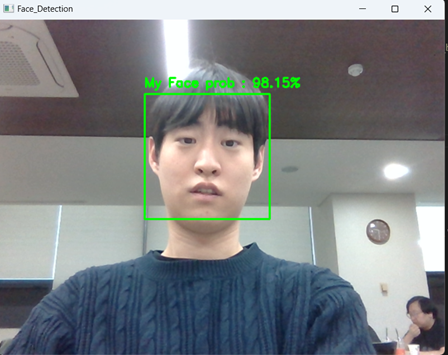

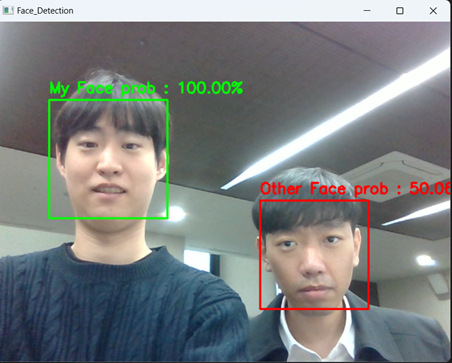